# Visualize False Presupposition

### Imports

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
import pandas as pd
import random
pd.set_option('display.max_colwidth', None)

### Load Datasets

In [ ]:
df = pd.read_csv('set_subset_responses_complete.csv')

In [ ]:
df_fp = pd.read_csv('False Presupposition (Graded, questions baked in).txt', delimiter=',')

In [ ]:
truth_pivot_ss = df.pivot_table(values='classLabel.xml:lang', columns='True or False', aggfunc='count')

### View pivot charts

In [ ]:
truth_pivot_ss

True or False,False,True
classLabel.xml:lang,12757,33535


In [ ]:
truth_pivot_fp = df_fp.pivot_table(values='classLabel.xml:lang', columns='refutes presupposition', aggfunc='count')
truth_pivot_fp

refutes presupposition,False,True
classLabel.xml:lang,4582,46


### Generate False Presupposition Bar Chart

In [ ]:
instance_error_rate = truth_pivot_ss[False].iloc[0] / df.shape[0]

In [ ]:
fp_error_rate = truth_pivot_fp[False].iloc[0] / df_fp.shape[0]

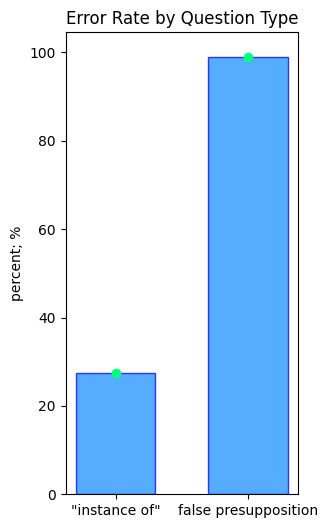

In [ ]:
# making a simple plot
a = ['"instance of"', 'false presupposition']
b = [instance_error_rate*100, fp_error_rate*100]
  
# Plot scatter here
plt.figure(figsize=(3,6))
plt.bar(a, b, width=0.6, color='dodgerblue', edgecolor='b', alpha=.75, align='center')
instance_conf = proportion_confint(truth_pivot_ss[False].iloc[0], df.shape[0], method='normal')

## Add error bars
fp_conf = proportion_confint(truth_pivot_fp[False].iloc[0], df_fp.shape[0], method='normal')
c = [instance_conf[1]*100-instance_conf[0]*100, fp_conf[1]*100-fp_conf[0]*100]
plt.errorbar(a, b, yerr=c, fmt="o", color="springgreen")

## Fix labels and titles
plt.ylabel("percent; %")
plt.title("Error Rate by Question Type")

plt.show()